In [3]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Ignore warnings for deprecated load_boston
import warnings
warnings.filterwarnings('ignore')

# Load data
boston = fetch_openml(name='boston', version=1, as_frame=True)
data = boston.frame
print(data.head())



      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


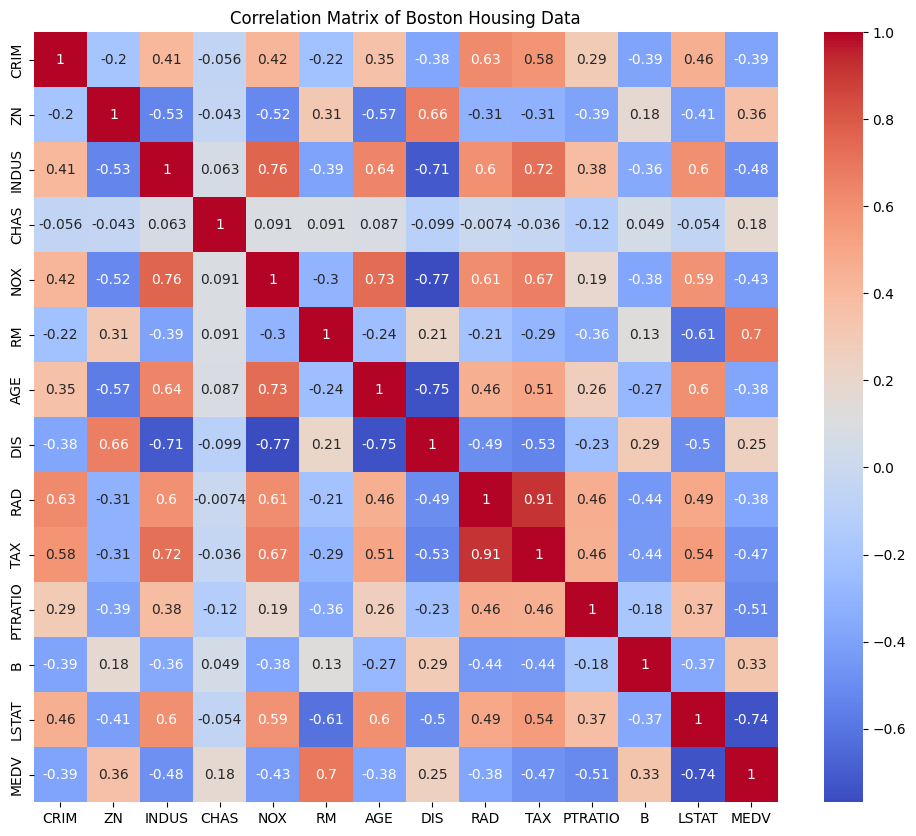

In [5]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Boston Housing Data')
plt.show()

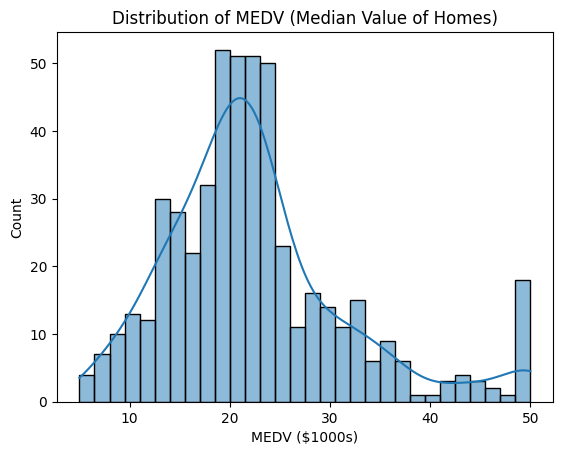

In [7]:
sns.histplot(data['MEDV'], bins=30, kde=True)
plt.title('Distribution of MEDV (Median Value of Homes)')
plt.xlabel('MEDV ($1000s)')
plt.show()


In [8]:
# Single feature: RM (Average number of rooms per dwelling)
X = data[['RM']]
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
simple_lr = LinearRegression()
simple_lr.fit(X_train, y_train)

y_pred = simple_lr.predict(X_test)


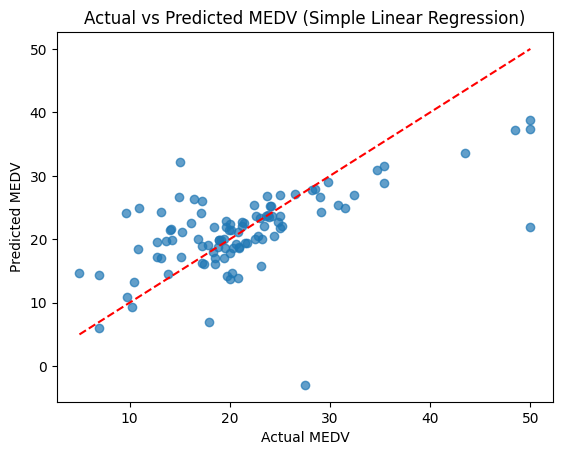

In [10]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV (Simple Linear Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


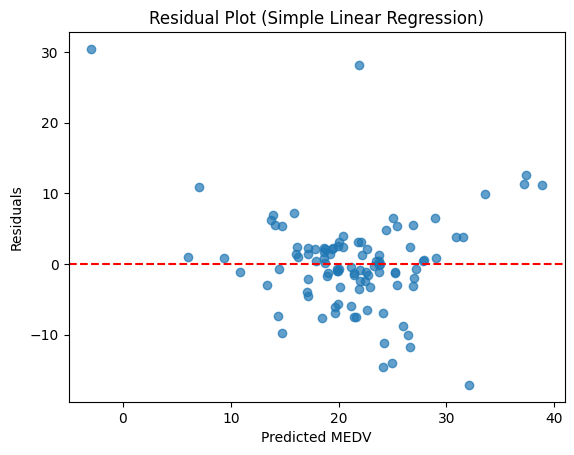

In [11]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted MEDV')
plt.ylabel('Residuals')
plt.title('Residual Plot (Simple Linear Regression)')
plt.show()


In [12]:
corr_matrix = data.corr()
correlations = corr_matrix['MEDV'].abs().sort_values(ascending=False)
print(correlations)
top5 = correlations.index[1:6]
print("Top 5 features most correlated with MEDV:", list(top5))


MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64
Top 5 features most correlated with MEDV: ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']


In [13]:
X_multi = data[list(top5)]
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)
multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)

y_pred_multi = multi_lr.predict(X_test)


In [14]:
print("R^2 Score:", r2_score(y_test, y_pred_multi))
print("MAE:", mean_absolute_error(y_test, y_pred_multi))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_multi)))


R^2 Score: 0.6196683547405641
MAE: 3.3357265551811977
RMSE: 5.281208043853635


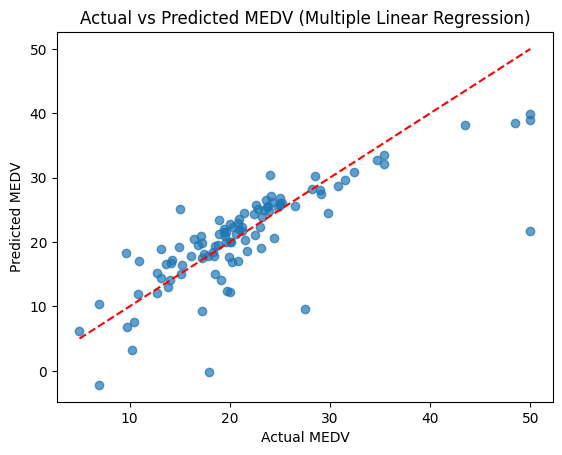

In [15]:
plt.scatter(y_test, y_pred_multi, alpha=0.7)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV (Multiple Linear Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


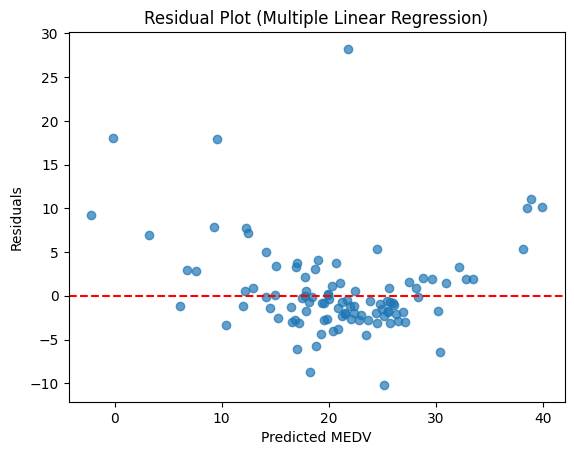

In [16]:
residuals_multi = y_test - y_pred_multi
plt.scatter(y_pred_multi, residuals_multi, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted MEDV')
plt.ylabel('Residuals')
plt.title('Residual Plot (Multiple Linear Regression)')
plt.show()
